<a href="https://colab.research.google.com/github/PiastaS/Deep-Learning-Challenge/blob/main/AlphabetSoupCharity_Optimzation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pandas as pd

In [4]:
#  import and read the .csv file
url = 'https://raw.githubusercontent.com/PiastaS/Deep-Learning-Challenge/main/Resources/Charity_data.csv'
charity_df = pd.read_csv(url)
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [7]:
# List out count per APPLICATION_TYPE
app_count = charity_df.APPLICATION_TYPE.value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

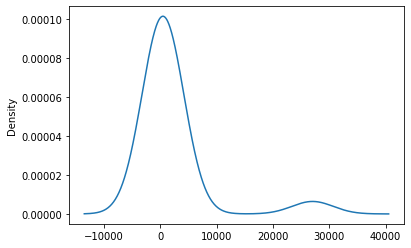

In [8]:
# Create a plot to see the density of the app_count
app_plt = app_count.plot.density()
app_plt

In [9]:
# Merge the smaller, unique data rows into an Other row
replace_app = list(app_count[app_count < 1000].index)
for app in replace_app:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app,'Other')
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [10]:
# Count Unique values per each column
charity_int = charity_df.dtypes[charity_df.dtypes != 'object'].index.tolist()
charity_df[charity_int].nunique()

EIN              34299
STATUS               2
ASK_AMT           8747
IS_SUCCESSFUL        2
dtype: int64

In [11]:
# List count for ASK_AMT values
ask_count = charity_df.ASK_AMT.value_counts()
ask_count

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

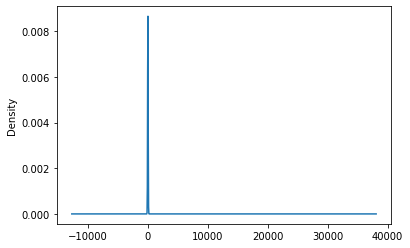

In [12]:
# Plot out ask_count
ask_plt = ask_count.plot.density()
ask_plt

In [13]:
# Created bins to group the ask amounts
size_bins=[0,10000,20000,30000,40000,50000,60000,70000,
           80000,90000,100000,500000,1000000,5000000,10000000,
           100000000,10000000000
          ]
group_names=["5000-10000","10001-20000",'20001-30000',
             '30001-40000','40001-50000','50001-60000',
             '60001-70000','70001-80000','80001-90000',
             '90001-100000','100001-500000','500001-1000000',
             '1000001-5000000','5000001-10000000','10000001-100000000',
             '100000001+'
            ]
charity_df["ASK_AMT"]=pd.cut(charity_df["ASK_AMT"],size_bins,labels=group_names)
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,Other,Independent,C1000,ProductDev,Association,1,0,N,5000-10000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,100001-500000,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000-10000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,5000-10000,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,100001-500000,1


In [14]:
# Set the values as object
charity_df = charity_df.astype({'ASK_AMT':'object'})

In [15]:
# Check the datatypes in the dataframe
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [16]:
# Drop data values that are not needed in the machine learning model
charity_df = charity_df.drop(columns=['NAME','EIN'])

In [17]:
# Set all datatypes to object
charity_cat = charity_df.dtypes[charity_df.dtypes == 'object'].index.tolist()
charity_df[charity_cat].nunique()

APPLICATION_TYPE           6
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT                   16
dtype: int64

In [18]:
# Check datatypes
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [19]:
# Encode the dataframe
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ASK_AMT_30001-40000,ASK_AMT_40001-50000,ASK_AMT_5000-10000,ASK_AMT_5000001-10000000,ASK_AMT_500001-1000000,ASK_AMT_50001-60000,ASK_AMT_60001-70000,ASK_AMT_70001-80000,ASK_AMT_80001-90000,ASK_AMT_90001-100000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Modify encoded data
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ASK_AMT_30001-40000,ASK_AMT_40001-50000,ASK_AMT_5000-10000,ASK_AMT_5000001-10000000,ASK_AMT_500001-1000000,ASK_AMT_50001-60000,ASK_AMT_60001-70000,ASK_AMT_70001-80000,ASK_AMT_80001-90000,ASK_AMT_90001-100000
0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Split the dataframe into train and test models
y = charity_df.IS_SUCCESSFUL.values
X = charity_df.drop(columns='IS_SUCCESSFUL').values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42,
                                                   stratify=y)

In [22]:
# Scale the X_train
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Find the Logistic Regression Model Accuracy
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)
log_classifier.fit(X_train,y_train)
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.714


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [24]:
# Find SVM Model Accuracy
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test_scaled)
print(f' SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}')

 SVM model accuracy: 0.704


In [25]:
# Find the Random Forest Predictive Accuracy
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.716


In [27]:
# Use Keras to set up a neural network
number_input_features = len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, 
                                   activation="relu", 
                                   input_dim=number_input_features))
nn_model.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1936      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,953
Trainable params: 1,953
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the neural network
nn_model.compile(loss="binary_crossentropy", 
                 optimizer="adam", 
                 metrics=["accuracy"])

In [29]:
# Run the neural network model
fit_model = nn_model.fit(X_train_scaled, 
                         y_train, 
                         epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6113 - accuracy: 0.7028
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.7291
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7310
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5532 - accuracy: 0.7315
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5507 - accuracy: 0.7334
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5494 - accuracy: 0.7332
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7337
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.7347
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7349
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7356

In [30]:
# Print the model_loss and model accuracy
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,
                                               y_test,
                                               verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5658 - accuracy: 0.7191 - 427ms/epoch - 2ms/step
Loss: 0.5657554864883423, Accuracy: 0.7190670371055603


In [31]:
# Modify the layers to get a better accuracy score
number_input_features = len(X_train_scaled[0])
hn_layer1 = 200
hn_layer2 = 100

nns = tf.keras.models.Sequential()
nns.add(
    tf.keras.layers.Dense(units=hn_layer1, 
                          input_dim=number_input_features,
                          activation='relu')
)
nns.add(
    tf.keras.layers.Dense(units=hn_layer2,
                          activation='relu')
)

nns.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
nns.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               24200     
                                                                 
 dense_3 (Dense)             (None, 100)               20100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 44,401
Trainable params: 44,401
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nns.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Run the model
fit_model = nns.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5746 - accuracy: 0.7215
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7313
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7342
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5451 - accuracy: 0.7363
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5433 - accuracy: 0.7376
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5417 - accuracy: 0.7372
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5400 - accuracy: 0.7388
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5392 - accuracy: 0.7385
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5376 - accuracy: 0.7400
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5363 - accuracy: 0.7397

In [34]:
# Print out accuracy score
model_loss, model_accuracy = nns.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 0s - loss: 0.5900 - accuracy: 0.7214 - 460ms/epoch - 2ms/step
Loss: 0.5899866819381714, Accuracy: 0.7213994264602661


In [ ]:
# Add more layers to improve the accuracy score
number_input_features = len(X_train_scaled[0])
hn_layer1 = 250
hn_layer2 = 100
hn_layer3 = 50
hn_layer4 = 20
nn = tf.keras.models.Sequential()
nn.add(
    tf.keras.layers.Dense(units=hn_layer1, 
                          input_dim=number_input_features,
                          activation='relu')
)
nn.add(
    tf.keras.layers.Dense(units=hn_layer2,
                          activation='relu')
)
nn.add(
    tf.keras.layers.Dense(units=hn_layer3,
                          activation='relu')
)
nn.add(
    tf.keras.layers.Dense(units=hn_layer4,
                          activation='relu')
)
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
nn.summary()

In [37]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Run the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 3ms/step - loss: 0.5738 - accuracy: 0.7199
Epoch 2/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.7317
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5488 - accuracy: 0.7343
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5475 - accuracy: 0.7336
Epoch 5/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5439 - accuracy: 0.7357
Epoch 6/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5427 - accuracy: 0.7377
Epoch 7/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5413 - accuracy: 0.7393
Epoch 8/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5406 - accuracy: 0.7372
Epoch 9/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5386 - accuracy: 0.7395
Epoch 10/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5372 - accuracy: 0.7402

In [39]:
# Print out the accuracy score
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

268/268 - 0s - loss: 0.6311 - accuracy: 0.7169 - 483ms/epoch - 2ms/step
Loss: 0.6310617327690125, Accuracy: 0.7168512940406799


In [41]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimized.h5')